### Install YOLO11 via Ultralytics

In [ ]:
!pip install ultralytics supervision roboflow

from IPython import display
display.clear_output()

!pip install ultralytics --quiet
import ultralytics
ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


### Load the Dataset

##### Configure API keys to Load the Dataset

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.
- **Roboflow**: Go to your [`Roboflow Dataset Download`](https://app.roboflow.com/settings/api) -> Select YOLO model -> Select `Show download code` -> click `Copy`.
    - In **Colab**: go to the left pane and click on `Secrets` (🔑). Store the Roboflow API Key under a username.
    - In **Kaggle**: Go to `Add-ons` → `Secrets` → `Add Secret` (🔑) and store your Kaggle API key and username.

In [ ]:
# Roboflow Dataset API Code
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EQzlZWiIne7a11mbb4o7")
project = rf.workspace("cse438-project").project("cse438-project")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CSE438-Project-1 in yolov11:: 100%|██████████| 2170/2170 [00:00<00:00, 6720.04it/s]


<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Model Training</p>

In [ ]:

# Training the YOLO model
!yolo task=detect mode=train model=yolo11x.pt data=/content/CSE438-Project-1/data.yaml epochs=50 batch=8 imgsz=640 plots=True

#Results saved to runs/detect/train
#Learn more at https://docs.ultralytics.com/modes/train

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/content/CSE438-Project-1/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

In [ ]:
# The list of files from the completed training is saved;
!ls /content/runs/detect/train

args.yaml					    labels_correlogram.jpg  train_batch0.jpg
events.out.tfevents.1736661071.254b8c79b635.1399.0  labels.jpg		    weights


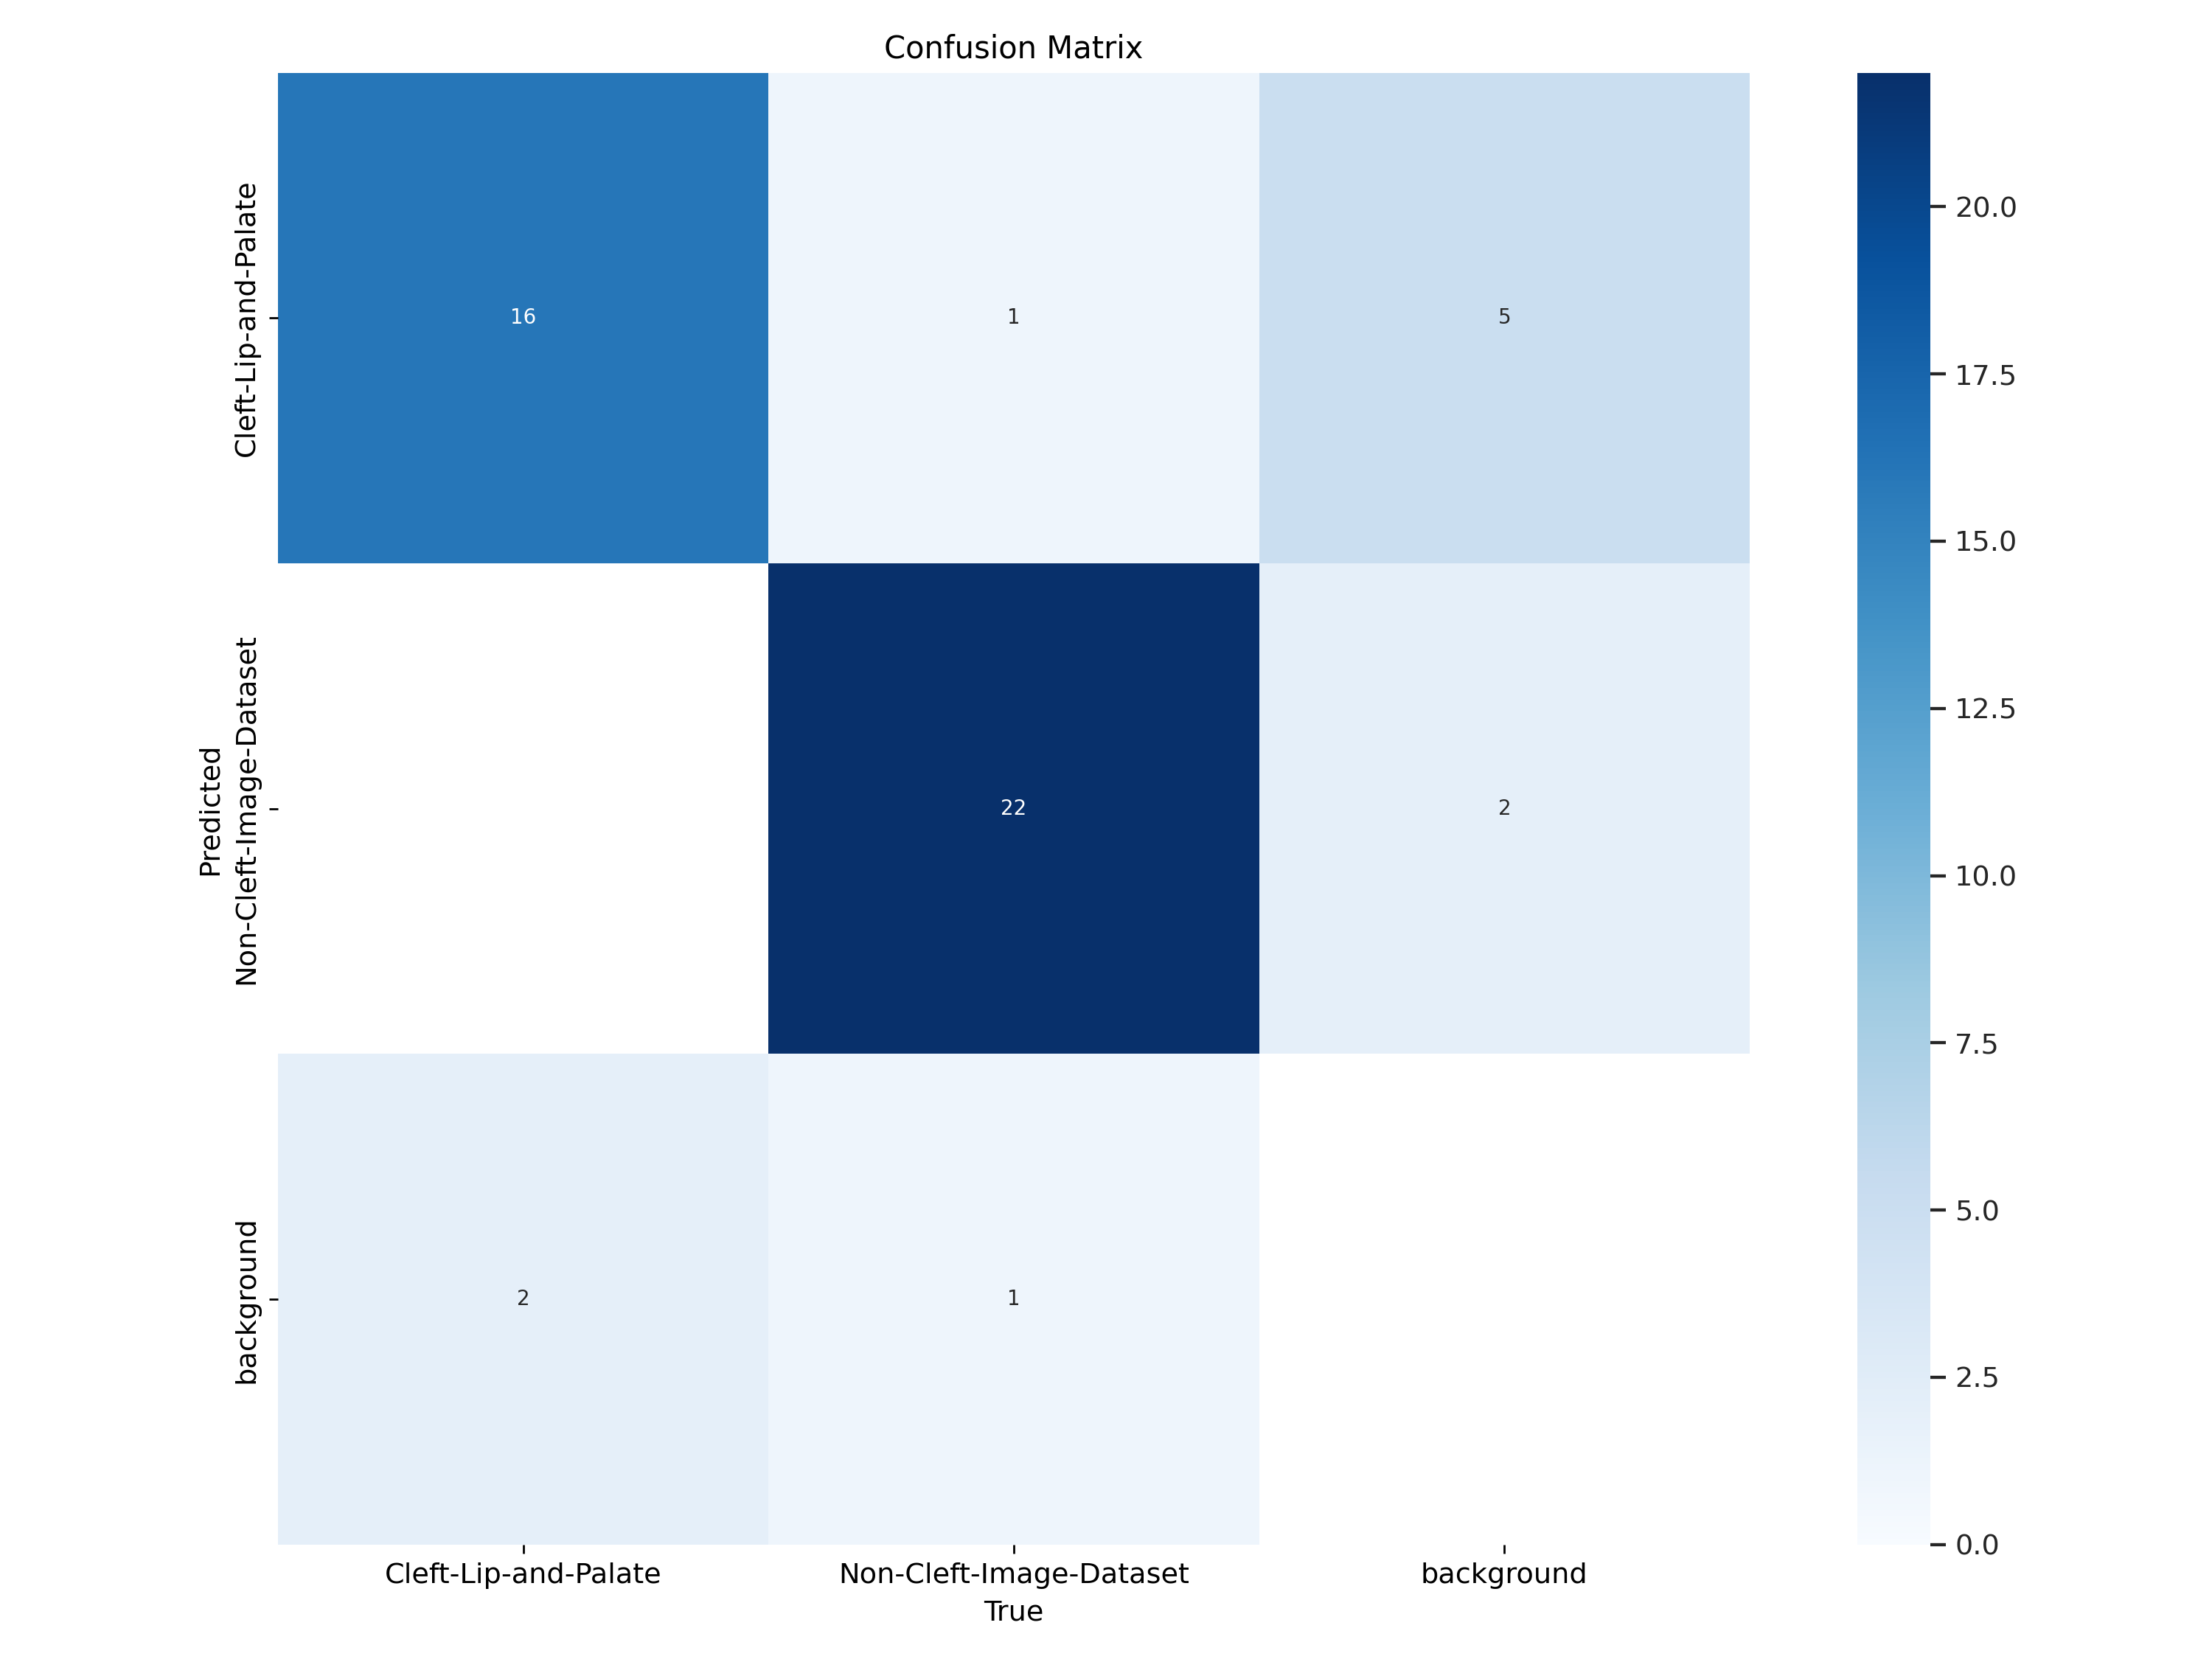

In [ ]:
from IPython.display import Image as IPyImage

# Display the confusion matrix image from the specified directory in Kaggle
IPyImage(filename='/content/runs/detect/train2/confusion_matrix.png', width=1000)

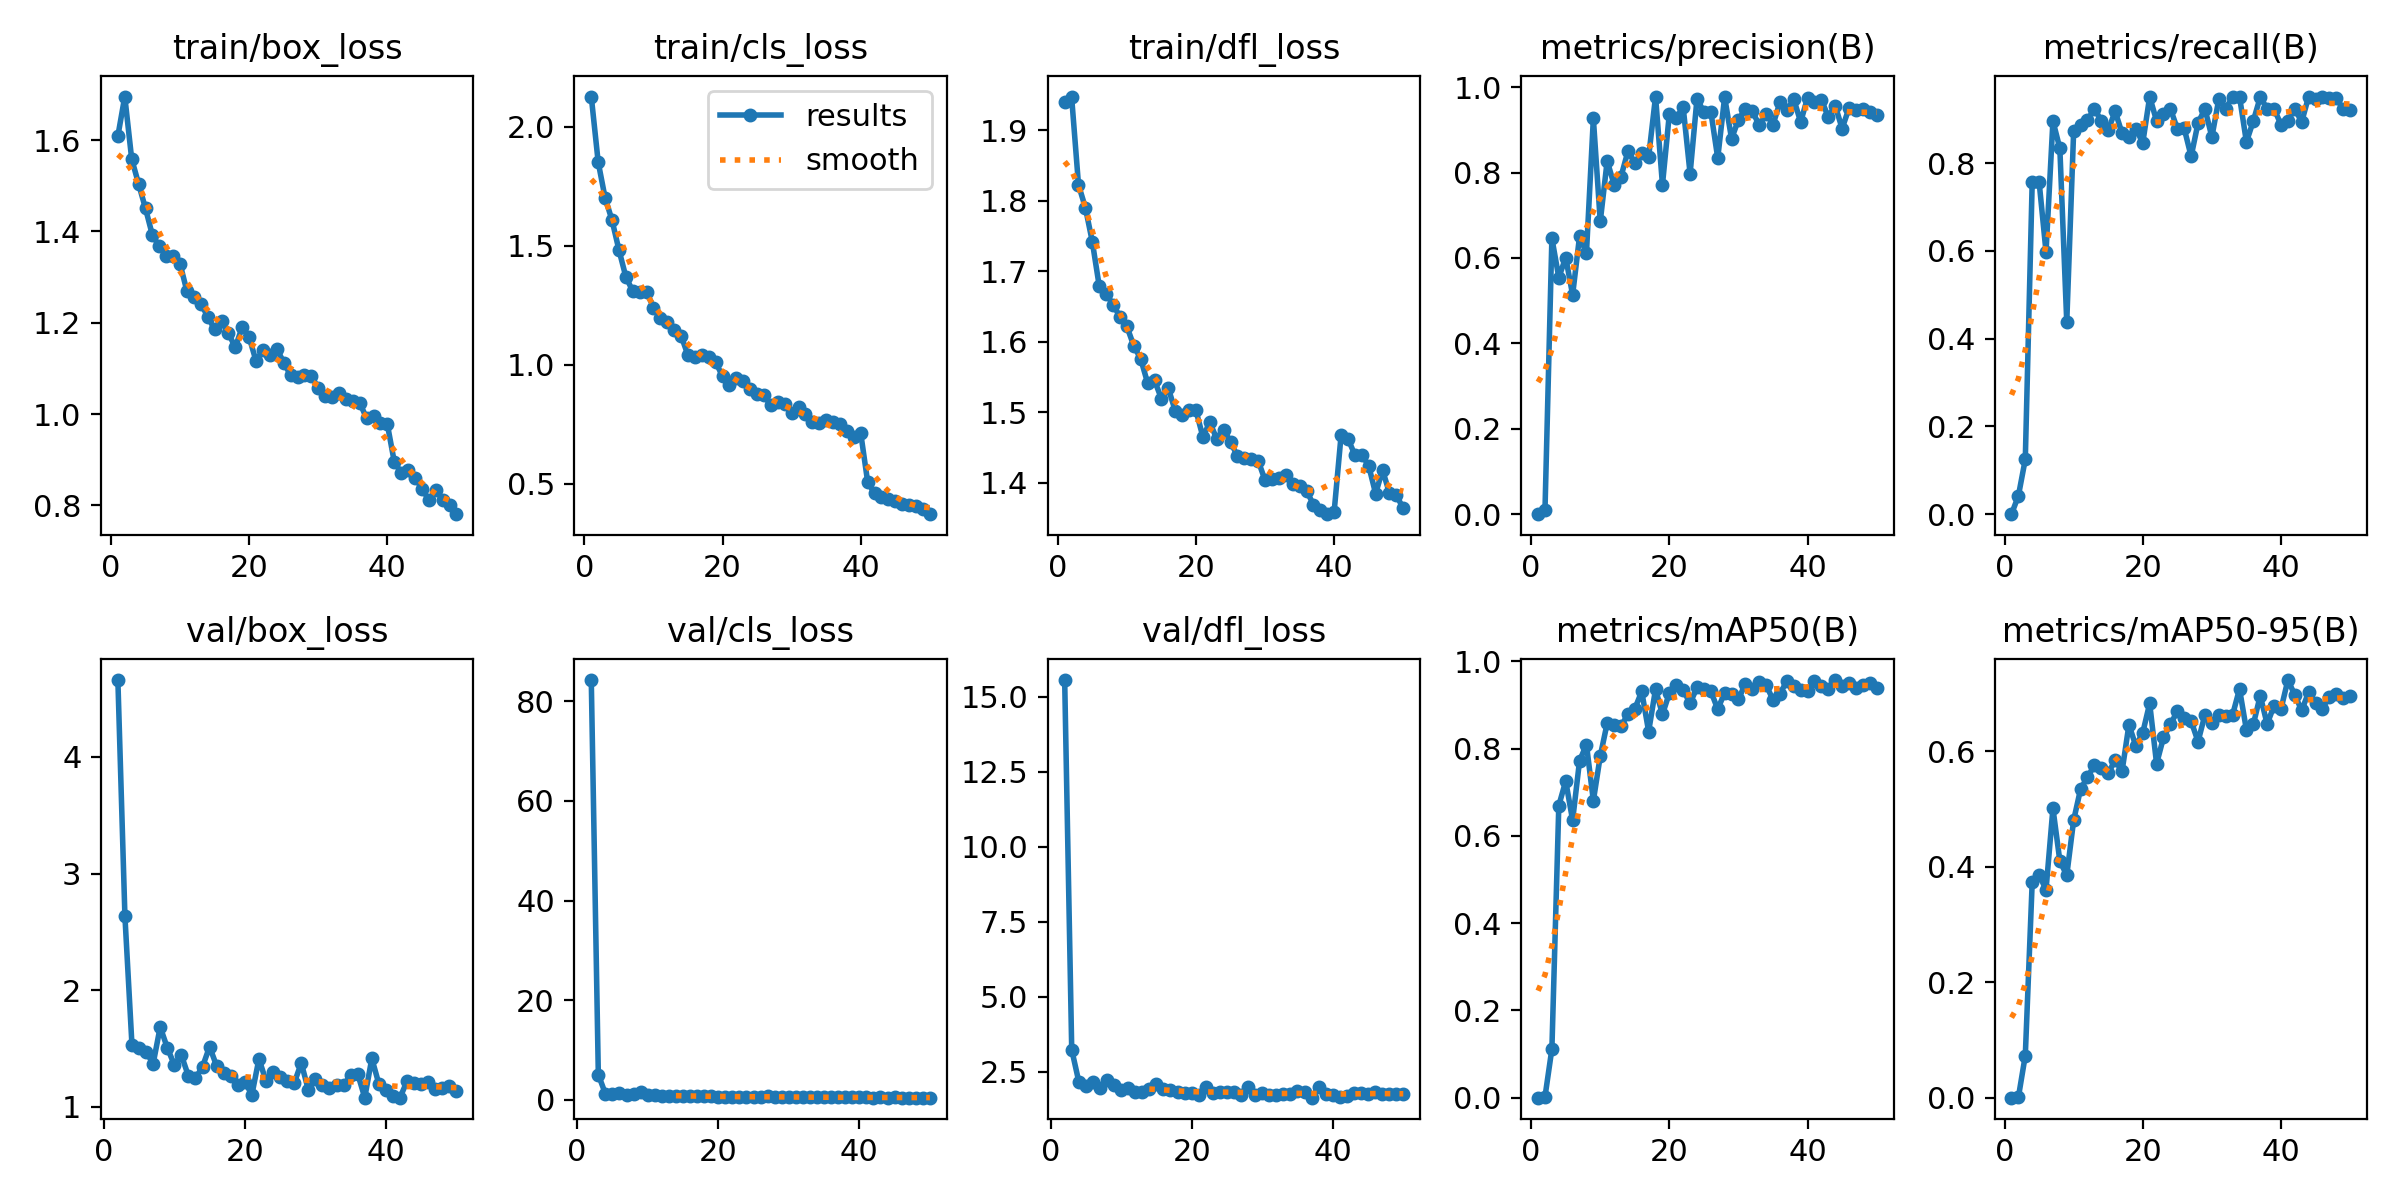

In [ ]:
IPyImage(filename=f'/content/runs/detect/train2/results.png', width=1000)

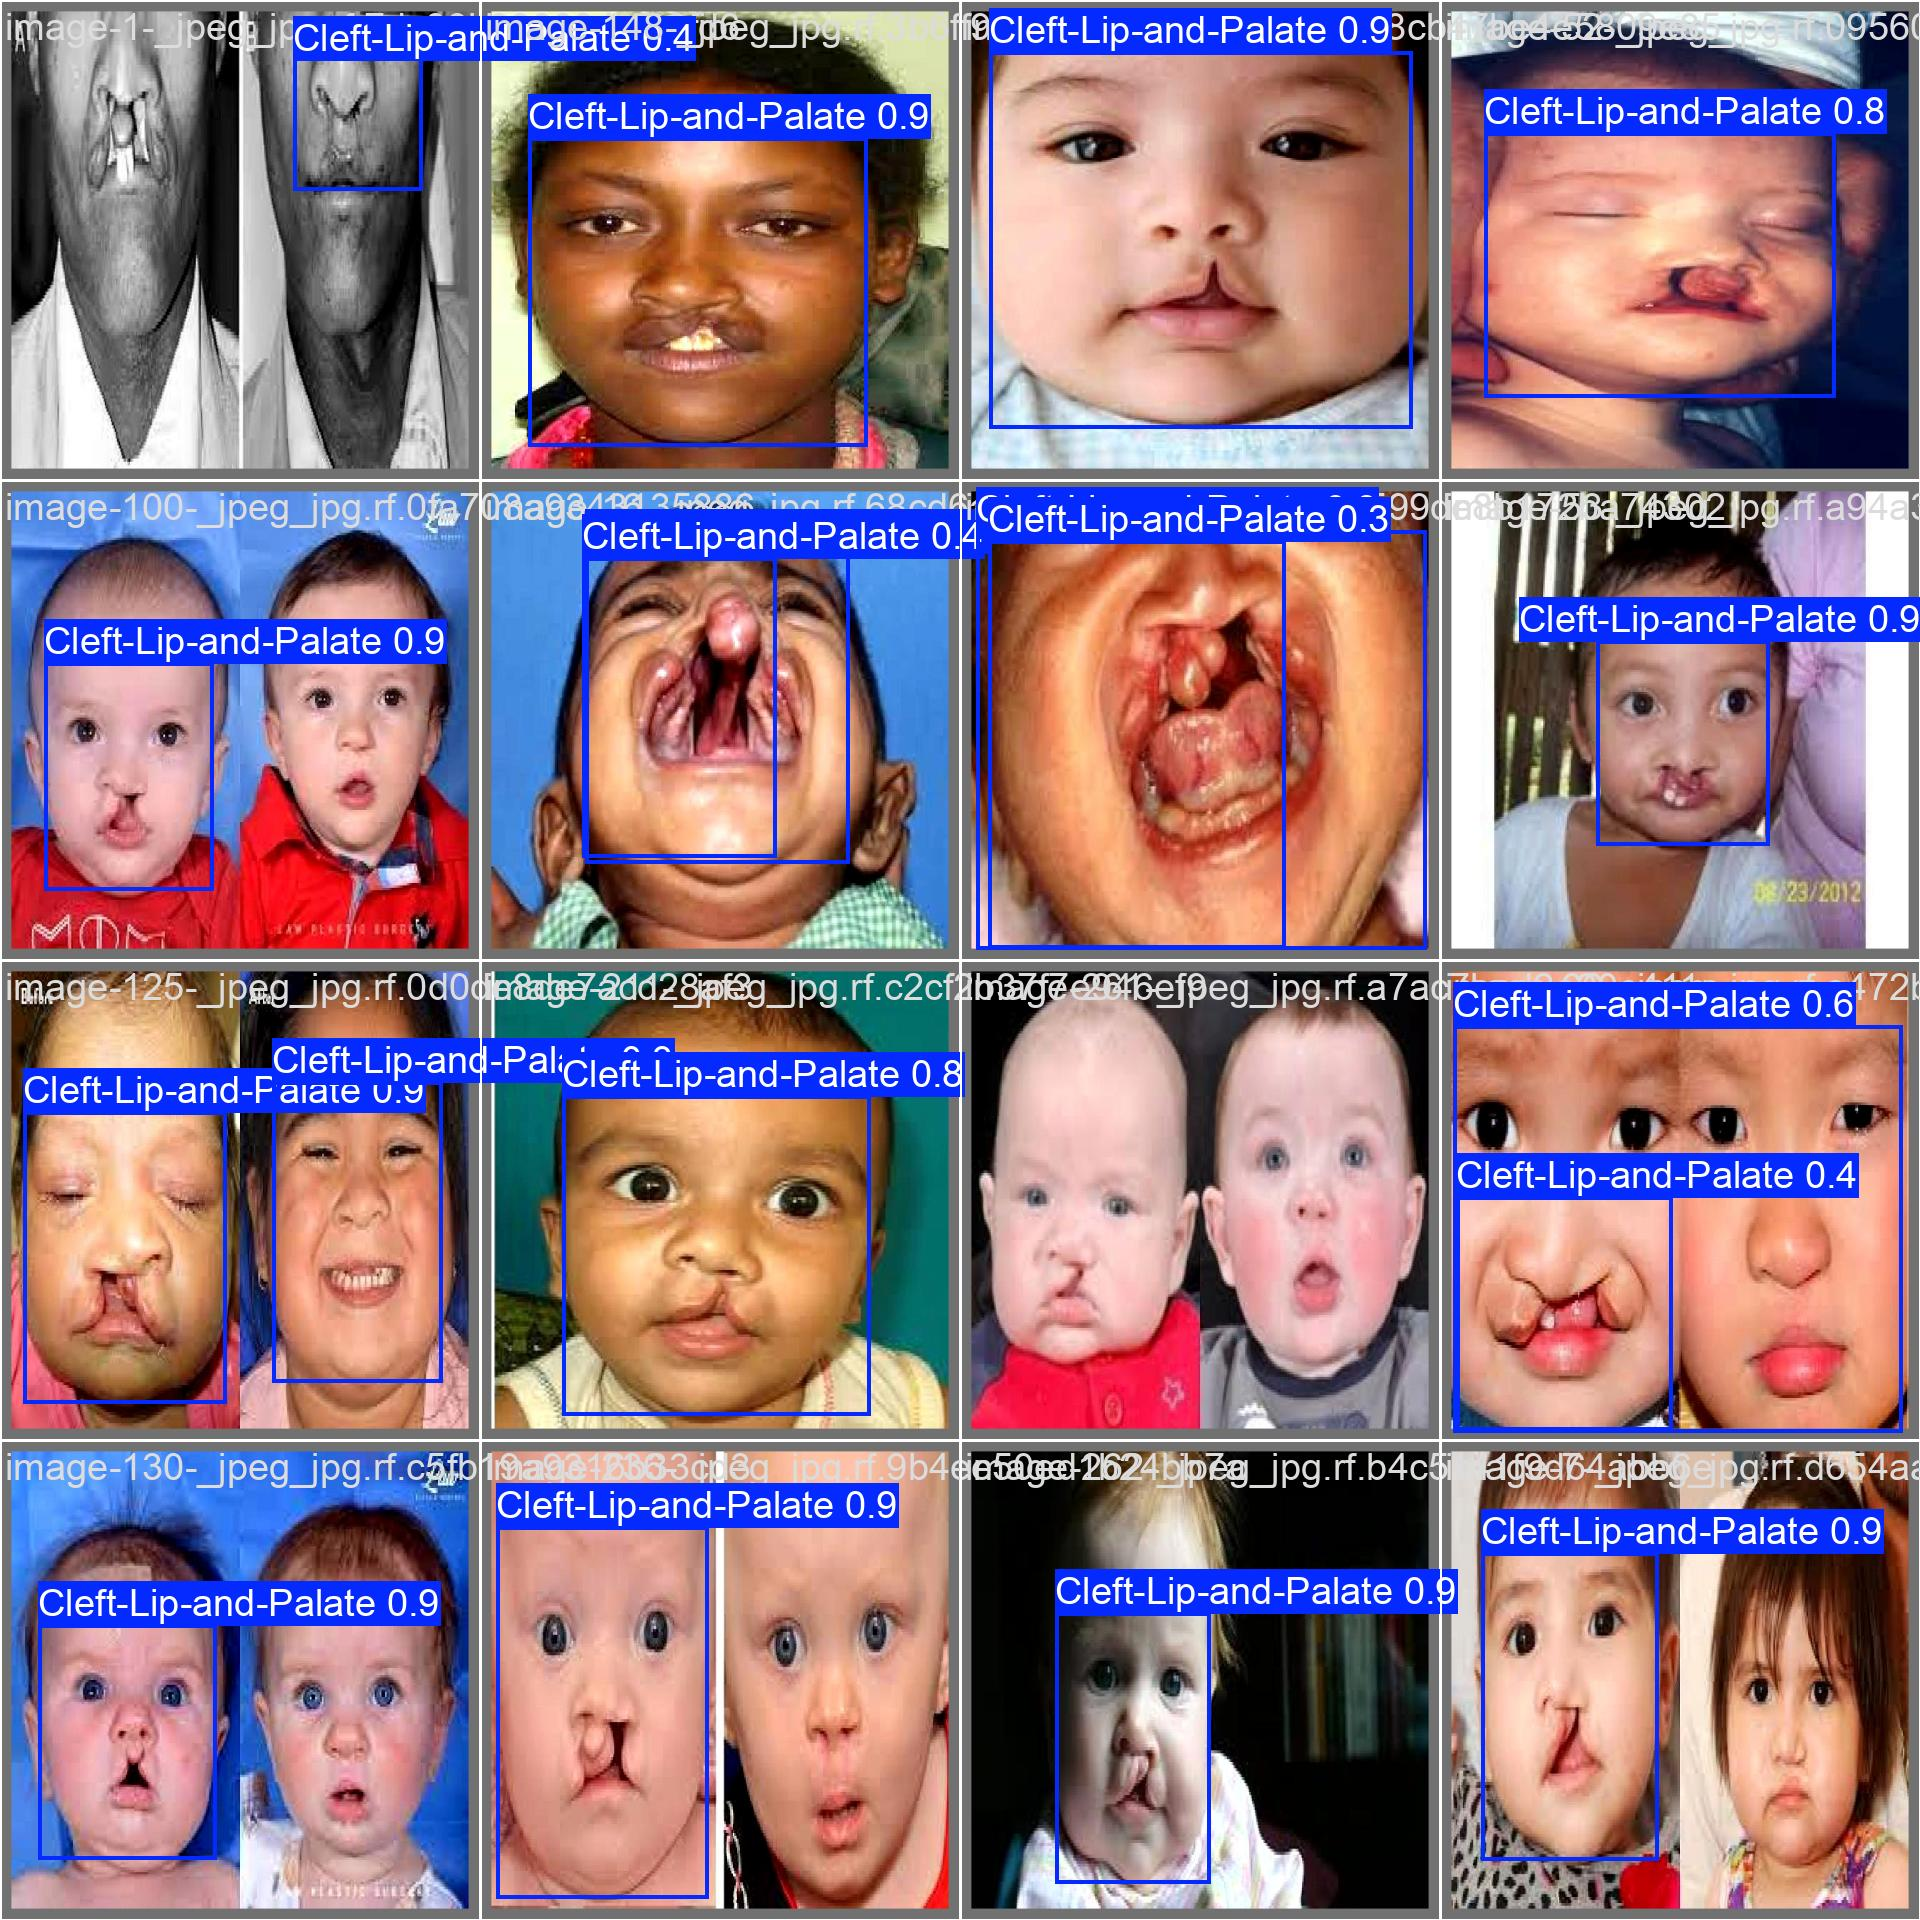

In [ ]:
IPyImage(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=1000)

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Validation of the Model</p>

In [ ]:
# Run the validation task using YOLO in Kaggle
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/CSE438-Project-1/data.yaml

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11x summary (fused): 464 layers, 56,829,334 parameters, 0 gradients, 194.4 GFLOPs
val: Scanning /content/CSE438-Project-1/valid/labels.cache... 42 images, 0 backgrounds, 0 corrupt: 100% 42/42 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.42s/it]
                   all         42         42      0.965      0.896      0.954      0.723
  Cleft-Lip-and-Palate         18         18      0.972      0.833      0.951      0.763
Non-Cleft-Image-Dataset         24         24      0.958      0.958      0.956      0.684
Speed: 6.7ms preprocess, 63.1ms inference, 0.0ms loss, 21.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Prediction</p>

In [ ]:
# Run the prediction task on Test Data
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/CSE438-Project-1/test/images save=True

#Results saved to runs/detect/predict
#💡 Learn more at https://docs.ultralytics.com/modes/predict

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11x summary (fused): 464 layers, 56,829,334 parameters, 0 gradients, 194.4 GFLOPs

image 1/41 /content/CSE438-Project-1/test/images/image-101-_jpeg_jpg.rf.6f00f79e0675bb30df5ce8eb9906c8d1.jpg: 640x640 1 Cleft-Lip-and-Palate, 76.4ms
image 2/41 /content/CSE438-Project-1/test/images/image-106-_jpeg_jpg.rf.edb4425a05c1e05c31b3c0d83bc999da.jpg: 640x640 2 Cleft-Lip-and-Palates, 72.7ms
image 3/41 /content/CSE438-Project-1/test/images/image-123-_jpeg_jpg.rf.5207e558ac6df56969e2637e067d9b24.jpg: 640x640 1 Cleft-Lip-and-Palate, 72.7ms
image 4/41 /content/CSE438-Project-1/test/images/image-135-_jpeg_jpg.rf.e294d1751e21a1a9a3ee8b355ebd39d0.jpg: 640x640 1 Cleft-Lip-and-Palate, 68.7ms
image 5/41 /content/CSE438-Project-1/test/images/image-137-_jpeg_jpg.rf.bf7e8a5365bbbea0e3b031cb8cac2611.jpg: 640x640 1 Cleft-Lip-and-Palate, 52.7ms
image 6/41 /content/CSE438-Project-1/test/images/image-144-_jpeg_jpg.rf.701ea4c3b1c55

## Prediction with Random Images

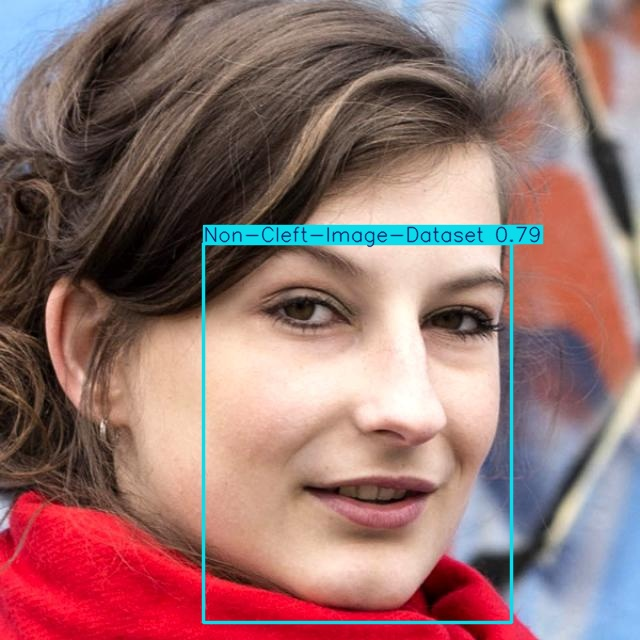

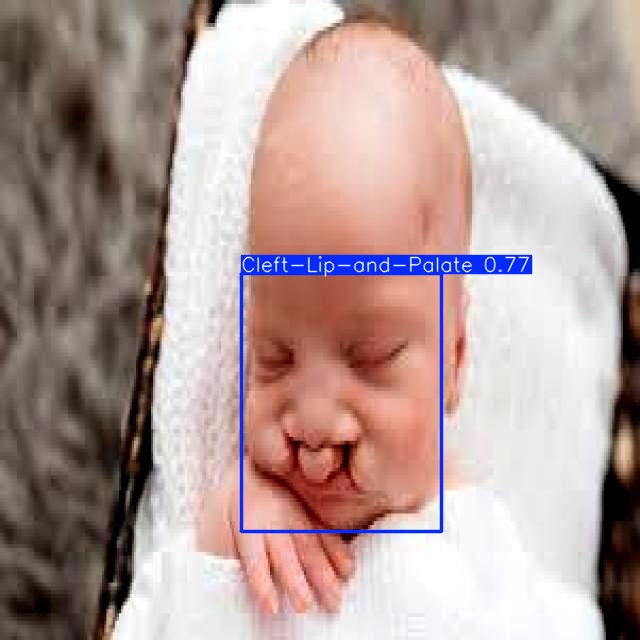

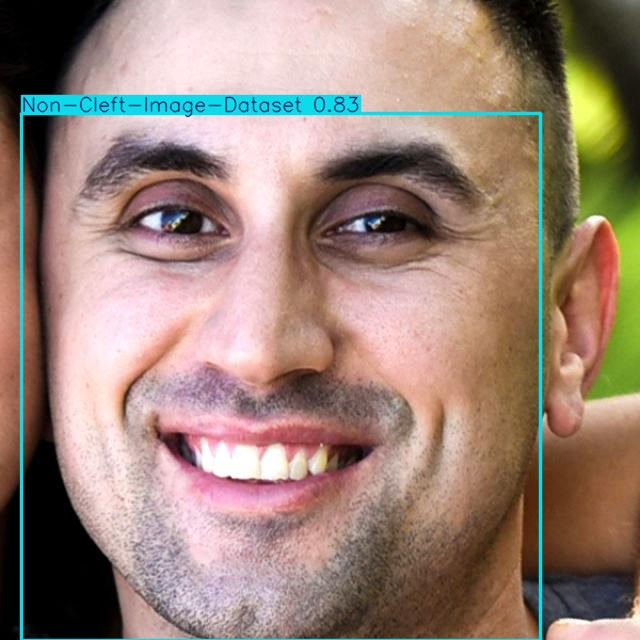

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

# Get the latest prediction folder for detection in Kaggle
latest_folder = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)

# Display images from the prediction folder
for img in glob.glob(f'{latest_folder}/*.jpg')[15:18]:
    display(IPyImage(filename=img, width=300))